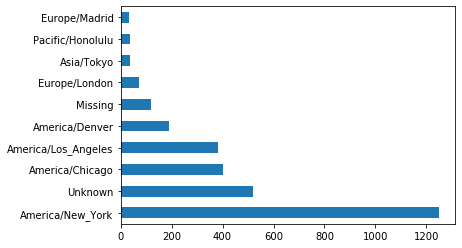

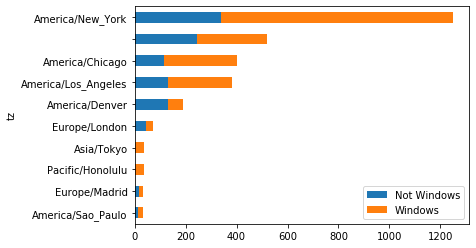

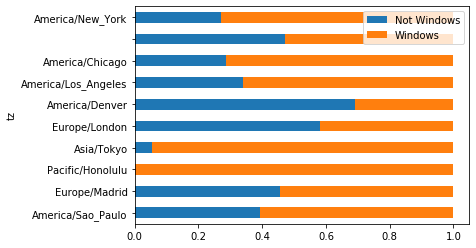

In [1]:
#!/usr/bin/env python 
# -*- coding:utf-8 -*-
import json
from Py_data_anlysis.ch02_function import*
from collections import Counter

path = '../pydata/datasets/bitly_usagov/example.txt'
records = []
#注意！！！！---------原文件是很多个json形式的数据
#在 open(path)这个文件对象中，有多个json形式的存储，所以生成的列表有许多被loads解析的json行
#被解析为一个字典 作为列表中的一个元素存储在列表中
records = [json.loads(line) for line in open(path)]
records[1]
records[0]
records[0]['tz'] #这是取第一个字典的  'tz'这个key所对应的value
#下面的操作是，取records中所有的字典，每一个为rec，如果rec中有关于时区（tz）的记录，则取key为
#'tz' 的 value 存放入time_zone这个列表中
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
#打印含 前十个列表时区元素 的列表
time_zones[:10]
#counts也是个字典
counts = get_counts(time_zones)
counts['America/New_York']
len(time_zones)
top_counts(counts)



#---------------用Counter类进行技术
counts = Counter(time_zones)
#counts是一个无序的字典 和get_counts得到的结果 或许是一致的（因为字典不计次序
counts.most_common(10)




#--------------用pandas经行对时区经行计数
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
frame = DataFrame(records)
frame
tz_count = frame['tz'].value_counts()
tz_count[:10]
#fillna()填补缺失值——NA（什么都没有，甚至连空串都没有）
# 而空字符串未变，所以找到空字符串，再填补上——8知道
#clean_tz就是一连串的时区，从frame中取的
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_count = clean_tz.value_counts()
tz_count[:10]
tz_count[:10].plot(kind='barh', rot=0)
#dropna()删除缺失的值
results = Series([x.split()[0] for x in frame.a.dropna()])
results[:5]
results.value_counts()[:8]
#notnull()检测有效值
cframe = frame[frame.a.notnull()]
cframe['a']
operating_system = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')
operating_system[:5]
by_tz_os = cframe.groupby(['tz', operating_system])
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]
agg_counts.sum(0)
#sum()里的数是指表格的行数
indexer = agg_counts.sum(1).argsort()
count_subset = agg_counts.take(indexer)[-10:]
count_subset
count_subset.plot(kind='barh', stacked=True)
#数值较小看不清比例，就把总体都设为1，看清楚比例
normed = count_subset.div(count_subset.sum(1), axis=0)
normed.plot(kind='barh', stacked=True)